In [5]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.9 MB 7.7 MB/s            
     |████████████████████████████████| 36.5 MB 87.6 MB/s            


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from tensorflow.keras.optimizers import Adam

2023-09-04 11:11:42.000053: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-04 11:11:42.000090: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-04 11:11:42.655241: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-04 11:11:42.655322: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-09-04 11:11:42.655330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [23]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [6]:
google_stock_df = pd.read_csv('google-stock-dataset-Daily.csv', index_col=False)
google_stock_df = google_stock_df.drop(columns=['Unnamed: 0'])

In [7]:
google_stock_df['Date'] = pd.to_datetime(google_stock_df['Date'])
google_stock_df.set_index('Date', inplace=True)

In [12]:
data = google_stock_df

In [14]:
# Use "Adj Close" for prediction
scaler = MinMaxScaler()
google_stock_df['Normalized_Adj_Close'] = scaler.fit_transform(google_stock_df['Adj Close'].values.reshape(-1, 1))

In [15]:
google_stock_df['Normalized_Adj_Close']

Date
2013-04-15    0.003061
2013-04-16    0.005204
2013-04-17    0.003138
2013-04-18    0.000000
2013-04-19    0.006505
                ...   
2023-03-27    0.637407
2023-03-28    0.626464
2023-03-29    0.629219
2023-03-30    0.625392
2023-03-31    0.647126
Name: Normalized_Adj_Close, Length: 2510, dtype: float64

In [16]:
# Create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [17]:
seq_length = 7
x, y = create_sequences(google_stock_df['Normalized_Adj_Close'].values, seq_length)

In [18]:
x

array([[0.00306115, 0.00520395, 0.00313768, ..., 0.00650494, 0.00650494,
        0.00803551],
       [0.00520395, 0.00313768, 0.        , ..., 0.00650494, 0.00803551,
        0.00910691],
       [0.00313768, 0.        , 0.00650494, ..., 0.00803551, 0.00910691,
        0.0082651 ],
       ...,
       [0.62791766, 0.65623326, 0.64437132, ..., 0.66021275, 0.63740721,
        0.62646361],
       [0.65623326, 0.64437132, 0.66143721, ..., 0.63740721, 0.62646361,
        0.62921864],
       [0.64437132, 0.66143721, 0.66021275, ..., 0.62646361, 0.62921864,
        0.62539221]])

In [19]:
y

array([0.00910691, 0.0082651 , 0.00681105, ..., 0.62921864, 0.62539221,
       0.64712635])

In [20]:
# Split the data into training and testing sets
train_size = int(len(x) * 0.80)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [21]:
x_train

array([[0.00306115, 0.00520395, 0.00313768, ..., 0.00650494, 0.00650494,
        0.00803551],
       [0.00520395, 0.00313768, 0.        , ..., 0.00650494, 0.00803551,
        0.00910691],
       [0.00313768, 0.        , 0.00650494, ..., 0.00803551, 0.00910691,
        0.0082651 ],
       ...,
       [0.63442259, 0.63105533, 0.6309788 , ..., 0.63610622, 0.63633581,
        0.64253463],
       [0.63105533, 0.6309788 , 0.62807071, ..., 0.63633581, 0.64253463,
        0.66824826],
       [0.6309788 , 0.62807071, 0.63610622, ..., 0.64253463, 0.66824826,
        0.70238004]])

In [75]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=60, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
# Train the model on the entire dataset
model.fit(x, y, epochs=200, batch_size=32)

Epoch 1/200
79/79 [==============================] - 1s 3ms/step - loss: 0.0428
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 5.7158e-04
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 3.0006e-04
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 2.9078e-04
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 2.7352e-04
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 2.6739e-04
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 2.7766e-04
Epoch 8/200
79/79 [==============================] - 0s 3ms/step - loss: 2.6266e-04
Epoch 9/200
79/79 [==============================] - 0s 3ms/step - loss: 2.5473e-04
Epoch 10/200
79/79 [==============================] - 0s 3ms/step - loss: 2.5982e-04
Epoch 11/200
79/79 [==============================] - 0s 3ms/step - loss: 2.5410e-04
Epoch 12/200
79/79 [==============================] - 0s 3ms/step - loss: 2.50

In [77]:
# Predict values for the last 502 days (without providing X_test)
last_502_days_data = google_stock_df['Normalized_Adj_Close'][-seq_length:].values.reshape(1, seq_length, 1)
predicted_values = []

In [78]:
for _ in range(502):
    next_value = model.predict(last_502_days_data)[0, 0]
    predicted_values.append(next_value)
    last_502_days_data = np.roll(last_502_days_data, -1, axis=1)
    last_502_days_data[0, -1, 0] = next_value

1/1 [==============================] - 0s 16ms/step


In [79]:
last_502_days_data

array([[[0.92488128],
        [0.92488748],
        [0.92489344],
        [0.9248994 ],
        [0.92490524],
        [0.92491108],
        [0.92491686]]])

In [80]:
# Inverse transform the scaled data to get the original values
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

In [81]:
predicted_values

array([[103.81324 ],
       [103.98985 ],
       [104.19073 ],
       [104.389084],
       [104.59131 ],
       [104.795006],
       [105.017746],
       [105.23899 ],
       [105.46063 ],
       [105.68263 ],
       [105.90506 ],
       [106.12802 ],
       [106.35159 ],
       [106.57595 ],
       [106.80114 ],
       [107.02721 ],
       [107.254166],
       [107.482086],
       [107.71101 ],
       [107.940994],
       [108.1721  ],
       [108.40435 ],
       [108.6378  ],
       [108.87252 ],
       [109.10856 ],
       [109.345985],
       [109.58484 ],
       [109.82517 ],
       [110.06706 ],
       [110.31058 ],
       [110.555756],
       [110.802666],
       [111.05139 ],
       [111.301994],
       [111.55452 ],
       [111.80906 ],
       [112.065674],
       [112.32444 ],
       [112.58518 ],
       [112.84783 ],
       [113.11248 ],
       [113.37923 ],
       [113.648155],
       [113.91937 ],
       [114.19295 ],
       [114.46896 ],
       [114.74753 ],
       [115.0

In [82]:
# Get the actual "Adj Close" values for the last 502 days
actual_values = google_stock_df['Adj Close'][-502:].values.reshape(-1, 1)

In [83]:
actual_values

array([[110.46],
       [111.95],
       [112.52],
       [113.53],
       [112.23],
       [112.72],
       [112.1 ],
       [114.26],
       [114.14],
       [114.49],
       [113.95],
       [113.92],
       [112.63],
       [115.  ],
       [115.5 ],
       [114.55],
       [117.95],
       [119.64],
       [117.68],
       [117.15],
       [115.34],
       [115.74],
       [116.87],
       [117.6 ],
       [114.59],
       [113.5 ],
       [110.01],
       [111.45],
       [113.92],
       [114.45],
       [113.12],
       [113.57],
       [115.35],
       [114.71],
       [118.05],
       [118.14],
       [119.02],
       [118.13],
       [117.84],
       [119.06],
       [118.53],
       [117.38],
       [119.68],
       [120.11],
       [119.92],
       [120.4 ],
       [121.76],
       [121.51],
       [122.45],
       [121.42],
       [120.77],
       [121.74],
       [120.11],
       [121.81],
       [122.33],
       [122.13],
       [122.5 ],
       [122.51],
       [122.54

In [84]:
# Create a DataFrame with Date, Actual, and Predicted values
prediction_df = pd.DataFrame({'Date': google_stock_df.index[-502:], 'Actual Price': actual_values.flatten(), 'Predicted Price': predicted_values.flatten()})
print(prediction_df)

          Date  Actual Price  Predicted Price
0   2021-04-06        110.46       103.813240
1   2021-04-07        111.95       103.989853
2   2021-04-08        112.52       104.190727
3   2021-04-09        113.53       104.389084
4   2021-04-12        112.23       104.591309
..         ...           ...              ...
497 2023-03-27        102.46       140.025833
498 2023-03-28        101.03       140.026611
499 2023-03-29        101.39       140.027374
500 2023-03-30        100.89       140.028137
501 2023-03-31        103.73       140.028885

[502 rows x 3 columns]


In [85]:
def evaluate(predictions):
    print("MSE",round(mean_squared_error(predictions['Actual Price'], predictions['Predicted Price']), 3))
    print("RMSE",round(np.sqrt(mean_squared_error(predictions['Actual Price'], predictions['Predicted Price'])), 3))
    print("MAE",round(mean_absolute_error(predictions['Actual Price'], predictions['Predicted Price']), 3))

In [86]:
evaluate(prediction_df)

MSE 715.026
RMSE 26.74
MAE 21.252


In [87]:
prediction_df.to_csv('LSTM_Output', index=False)

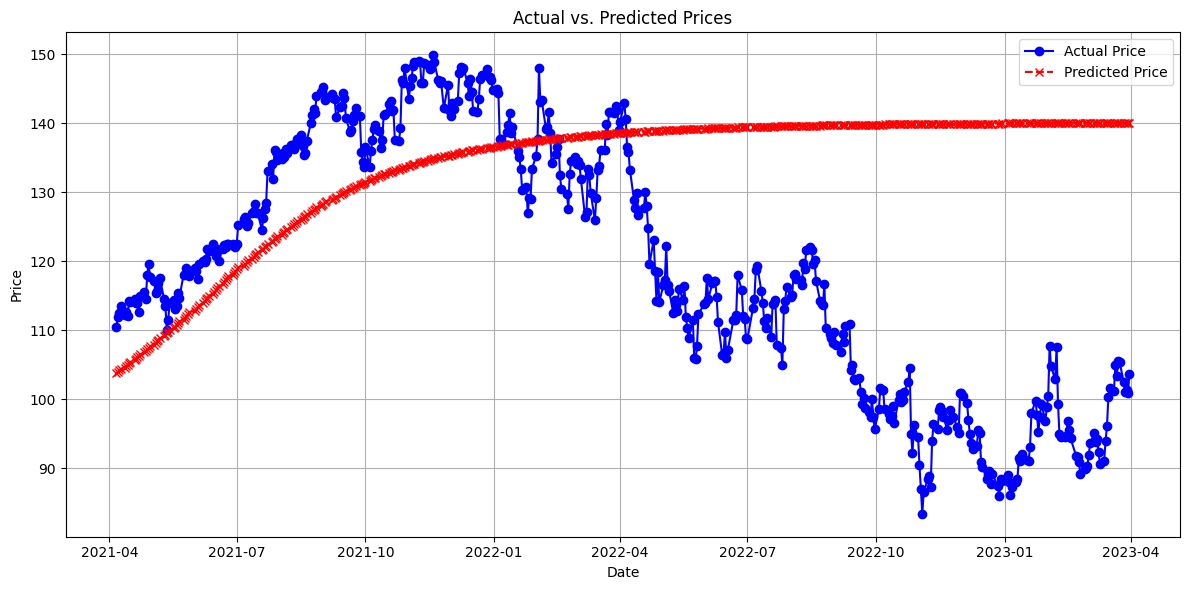

In [96]:
# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(prediction_df['Date'], prediction_df['Actual Price'], label='Actual Price', marker='o', linestyle='-', color='blue')
plt.plot(prediction_df['Date'], prediction_df['Predicted Price'], label='Predicted Price', marker='x', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the graph (you can also save it as an image using plt.savefig)
plt.show()





